In [200]:

# IT HAS BEEN OBSERVED THAT A LOT OF YOUNG PEOPLE FACE SOME CHALLENGES WHILE KICK-STARTING THEIR CAREERS AND TRYING TO MOVE
# OUT. THIS IS USUALLY BECAUSE THEY TEND TO MOVE TO BIGGER CITIES WHERE ACCOMODATION IS EXPENSIVE. THIS NOTEBOOK CONTAINS 
# DATA COLLECTED WITH REGARDS TO COST OF ACOOMODATION AND LEVEL OF INCOME ACROSS THE AGE GROUP OF 18 - 29 YEARS. THIS
# NOTEBOOKS AIMS TO ANALYZE THIS DATA AND SHOW THE RELATIONSHIPS BETWEEN INCOME AND MONEY SPENT ON ACCOMMODATION BY YOUNG 
#ADULTS

In [201]:
#IMPORTING RELEVANT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib as plt 
%matplotlib inline
import seaborn as sns 

In [202]:
#READING THE DOCUMENT TO DATA FRAME
df = pd.read_csv(r'C:\Users\User\Desktop\Accommodation Assessment Form (Responses) - Form responses 1.csv' )

In [203]:
df.head(10)

,Timestamp,Age,Gender,Maximum Level of Education,Country,State/Province,"Based on your answer above, how industrious is your State of residence?",Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?
0,20/01/2021 07:57:57,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000,Yes
1,20/01/2021 09:02:41,27,Female,Bachelor's Degree/Equivalent,Kenya,Nairobi,Most industrious in the country,Kenyan Shillings,150000,Software Engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000,Yes
2,20/01/2021 09:07:23,25,Female,High/Secondary School,South Africa,Cape Town,Non-Industrious,Rand,2000,Hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,R3500,Yes
3,20/01/2021 09:27:26,28,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,0,IT,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,NaN,Yes
4,20/01/2021 09:27:53,24,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,70000,Tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,N/A,Yes
5,20/01/2021 10:22:51,22,Female,Bachelor's Degree/Equivalent,Nigeria,Abia state,Industrious,Naira,30000,Tech,0.0,No,NaN,Neither. I do not pay rents,Mid-class area,NaN,No
6,20/01/2021 10:39:12,20,Female,High/Secondary School,Nigeria,Lagos,Industrious,Naira,0,Tech,0.0,No,NaN,Neither. I do not pay rents,High brow area,NaN,Yes
7,20/01/2021 10:50:19,28,Female,Master's Degree,Nigeria,Rivers State,Industrious,Naira,0,Engineering,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,NaN,Yes
8,20/01/2021 11:00:07,20,Female,Undergraduate,Nigeria,Rivers State,Industrious,Naira,15000,Tech,1.0,Not completely,1/2,Self-contained,Mid-class area,140000,Yes
9,20/01/2021 11:00:31,27,Male,Bachelor's Degree/Equivalent,Nigeria,Delta,Industrious,Naira,145000,Engineering,3.0,Yes,NaN,Full Flat,Low brow area,20000,Yes


In [204]:
#CHECKING FOR THE GENERAL STATISTICS OF THE DATA
df.describe()

,Age,Monthly Salary in the currency you mentioned above,Years of working experience
count,121.000000,121.000000,121.000000
mean,23.421488,60587.603306,1.492975
std,2.798071,113215.106155,1.840282
min,18.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,23.000000,20000.000000,1.000000
75%,25.000000,70000.000000,2.000000
max,29.000000,800000.000000,10.000000


In [205]:
#CHECKING FOR DATA TYPES
df.dtypes

Timestamp                                                                                             object
Age                                                                                                    int64
Gender                                                                                                object
Maximum Level of Education                                                                            object
Country                                                                                               object
State/Province                                                                                        object
Based on your answer above, how industrious is your State of residence?                               object
Currency                                                                                              object
Monthly Salary in the currency you mentioned above                                                     int64
Career Industry    

In [206]:
#CHECKING FOR MISSING VARIABLES
df.isnull().sum()

Timestamp                                                                                             0
Age                                                                                                   0
Gender                                                                                                0
Maximum Level of Education                                                                            0
Country                                                                                               0
State/Province                                                                                        0
Based on your answer above, how industrious is your State of residence?                               3
Currency                                                                                              0
Monthly Salary in the currency you mentioned above                                                    0
Career Industry                                                 

In [207]:
#Checking the components of the cost of accomodation colum
df['Cost of your accommodation per month'].value_counts()

10000           9
25000           6
5000            5
7000            2
3000            2
6500            2
15000           2
12500           2
60000           2
18000           2
1500            1
180,000         1
12,500          1
17,000          1
12000           1
10,000          1
3333            1
#5000           1
150,000         1
140             1
55,000          1
6250            1
R3500           1
200,000         1
35000           1
10830           1
23000           1
83000           1
11600           1
13,200          1
None            1
40, 000         1
33,333          1
22000           1
17000           1
35,000          1
167000          1
300000          1
700,000         1
20833           1
100000          1
120,000         1
16,666 NAIRA    1
0               1
15,000          1
 N/A            1
20000           1
180000          1
140000          1
5800            1
80000           1
1000            1
30000 naira     1
17500           1
45              1
15        

In [208]:
#Giving the enteries a uniform format

df['Cost of your accommodation per month'].replace({"16,666 NAIRA":'16666', "#5000":"5000","30000 naira":"30000", "#10,000": "10000", "R3500": "3500"}, inplace = True)

In [209]:
#Giving the enteries a uniform format
df['Cost of your accommodation per month'].replace({"15,000": "15000", "16,666":"16666","180,000" : "180000", "17,000" : "17000", "12,500": "12500", "120,000":"120000", "13,200": "13200", "33,333": "33333", "55,000":"55000", "150,000": "150000", "40, 000": "40000", "35,000": "35000", "700,000": "700000", "10,000": "10000", "200,000": "200000", "None": "0", " N/A": "0"}, inplace=True)

In [210]:
#filling the NaN with 0
df['Cost of your accommodation per month'].fillna(0, inplace=True)

In [211]:
#Changing the data type to int
df['Cost of your accommodation per month'] = df['Cost of your accommodation per month'].astype('float')

In [212]:
#Getting an overview of the currency column
df.Currency.unique()

array(['Naira', 'Kenyan Shillings', 'Rand', 'Naira ', 'NAIRA',
       'Naira, Dollars', 'Dollars', 'NAIRA ', 'NARIA'], dtype=object)

In [213]:
#Creating a uniform data format for easy grouping of the cost of accomodation values
df['Currency'].replace({"Naira" :'Naira', 'Naira ':'Naira', 'NAIRA':'Naira', 'NAIRA ':'Naira', 'NARIA' : 'Naira' }, inplace=True)

In [214]:
#Repplacing the 0 with Nan and then filling them with mean values, grouped by currency
df['Cost of your accommodation per month'] = df['Cost of your accommodation per month'].replace(0, np.nan)
df['Cost of your accommodation per month']=df['Cost of your accommodation per month'].fillna(df.groupby('Currency')['Cost of your accommodation per month'].transform('mean'))
df.head()

,Timestamp,Age,Gender,Maximum Level of Education,Country,State/Province,"Based on your answer above, how industrious is your State of residence?",Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?
0,20/01/2021 07:57:57,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000.000000,Yes
1,20/01/2021 09:02:41,27,Female,Bachelor's Degree/Equivalent,Kenya,Nairobi,Most industrious in the country,Kenyan Shillings,150000,Software Engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000.000000,Yes
2,20/01/2021 09:07:23,25,Female,High/Secondary School,South Africa,Cape Town,Non-Industrious,Rand,2000,Hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,3500.000000,Yes
3,20/01/2021 09:27:26,28,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,0,IT,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,45628.378378,Yes
4,20/01/2021 09:27:53,24,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,70000,Tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,45628.378378,Yes


In [215]:
#Checking for more missing values
df.isnull().sum()

Timestamp                                                                                             0
Age                                                                                                   0
Gender                                                                                                0
Maximum Level of Education                                                                            0
Country                                                                                               0
State/Province                                                                                        0
Based on your answer above, how industrious is your State of residence?                               3
Currency                                                                                              0
Monthly Salary in the currency you mentioned above                                                    0
Career Industry                                                 

In [216]:
#renaming a column for easy calling
df = df.rename(columns={'Based on your answer above, how industrious is your State of residence?': 'How Industrious'})

In [217]:
#Checking for the change
df.head()

,Timestamp,Age,Gender,Maximum Level of Education,Country,State/Province,How Industrious,Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?
0,20/01/2021 07:57:57,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000.000000,Yes
1,20/01/2021 09:02:41,27,Female,Bachelor's Degree/Equivalent,Kenya,Nairobi,Most industrious in the country,Kenyan Shillings,150000,Software Engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000.000000,Yes
2,20/01/2021 09:07:23,25,Female,High/Secondary School,South Africa,Cape Town,Non-Industrious,Rand,2000,Hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,3500.000000,Yes
3,20/01/2021 09:27:26,28,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,0,IT,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,45628.378378,Yes
4,20/01/2021 09:27:53,24,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,70000,Tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,45628.378378,Yes


In [218]:
#Getting an overview of the column
df['How Industrious'].value_counts()

Industrious                        59
Most industrious in the country    36
Non-Industrious                    17
Unknown                             6
Name: How Industrious, dtype: int64

In [219]:
#Getting the mode of the column
mode = df['How Industrious'].mode()
mode

0    Industrious
dtype: object

In [220]:
#filling Nan with mode
df['How Industrious'].fillna(mode)

0                          Industrious
1      Most industrious in the country
2                      Non-Industrious
3      Most industrious in the country
4                          Industrious
                    ...               
116    Most industrious in the country
117                        Industrious
118                        Industrious
119                        Industrious
120                        Industrious
Name: How Industrious, Length: 121, dtype: object

In [221]:
#Checking for further irregularities 
df['How Industrious'].unique()

array(['Industrious', 'Most industrious in the country',
       'Non-Industrious', 'Unknown', nan], dtype=object)

In [222]:
#Making the data uniform
df['How Industrious'].replace({"Unknown":"Industrious", np.nan: "Industrious"} ,inplace = True)

In [223]:
#Confirming the uniformity
df['How Industrious'].value_counts()

Industrious                        68
Most industrious in the country    36
Non-Industrious                    17
Name: How Industrious, dtype: int64

In [224]:
#Checking for more mising values
df.isnull().sum()

Timestamp                                                                                             0
Age                                                                                                   0
Gender                                                                                                0
Maximum Level of Education                                                                            0
Country                                                                                               0
State/Province                                                                                        0
How Industrious                                                                                       0
Currency                                                                                              0
Monthly Salary in the currency you mentioned above                                                    0
Career Industry                                                 

In [225]:
#The only column with missing values here is dependent on another colmn, hence we ignore it.

In [226]:
df["Gender"].value_counts()

Female    78
Male      43
Name: Gender, dtype: int64

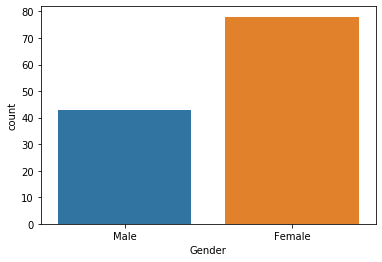

In [227]:
#Plotting the distributions of age, country and gender
sns.countplot(df.Gender)

In [228]:
#Showing the age distribution
df["Age"].value_counts()

22    23
23    19
25    14
24    12
21    12
29     9
20     9
27     7
19     7
28     6
26     2
18     1
Name: Age, dtype: int64

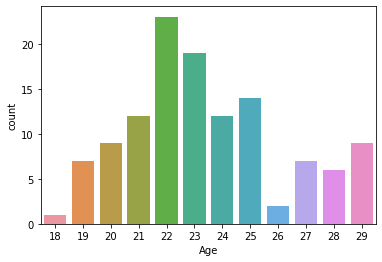

In [229]:
sns.countplot(df.Age)

In [230]:
#Getting the Country Column Uniform
df["Country"].replace({"Nigeria ": "Nigeria", "Nigeria": "Nigeria", "Nigeria":"Nigeria", "NIGERIA ":"Nigeria", "Nigerian": "Nigeria", "NIGERIA":"Nigeria","NIGERIA":"Nigeria", "NIGERIAN": "Nigeria", "Adamawa": "Nigeria" }, inplace = True)


In [231]:
#Showing the data distribution by country
df["Country"].value_counts()

Nigeria         117
Kenya             3
South Africa      1
Name: Country, dtype: int64

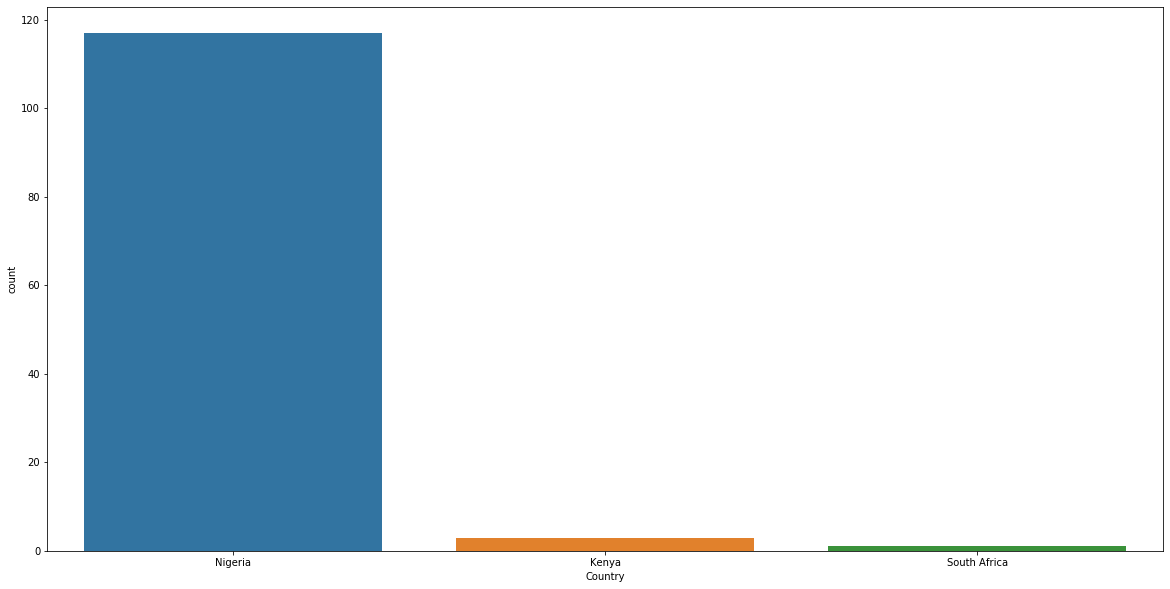

In [232]:

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.countplot(df.Country)


In [233]:
df["Currency"].value_counts()

Naira               115
Kenyan Shillings      3
Naira, Dollars        1
Rand                  1
Dollars               1
Name: Currency, dtype: int64

In [243]:
#Calculating the ratio of money spent on accomodation to income
df["Ratio of accomodation to income"] = (df["Cost of your accommodation per month"]/df["Monthly Salary in the currency you mentioned above"]) * 100
df.head()



,Timestamp,Age,Gender,Maximum Level of Education,Country,State/Province,How Industrious,Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?,Ratio of accomodation to income
0,20/01/2021 07:57:57,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000.000000,Yes,53.333333
1,20/01/2021 09:02:41,27,Female,Bachelor's Degree/Equivalent,Kenya,Nairobi,Most industrious in the country,Kenyan Shillings,150000,Software Engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000.000000,Yes,23.333333
2,20/01/2021 09:07:23,25,Female,High/Secondary School,South Africa,Cape Town,Non-Industrious,Rand,2000,Hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,3500.000000,Yes,175.000000
3,20/01/2021 09:27:26,28,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,0,IT,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,45628.378378,Yes,inf
4,20/01/2021 09:27:53,24,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,70000,Tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,45628.378378,Yes,65.183398


In [237]:
df["Do you foot your accommodation bills?"].value_counts()

No                62
Yes               39
Not completely    20
Name: Do you foot your accommodation bills?, dtype: int64

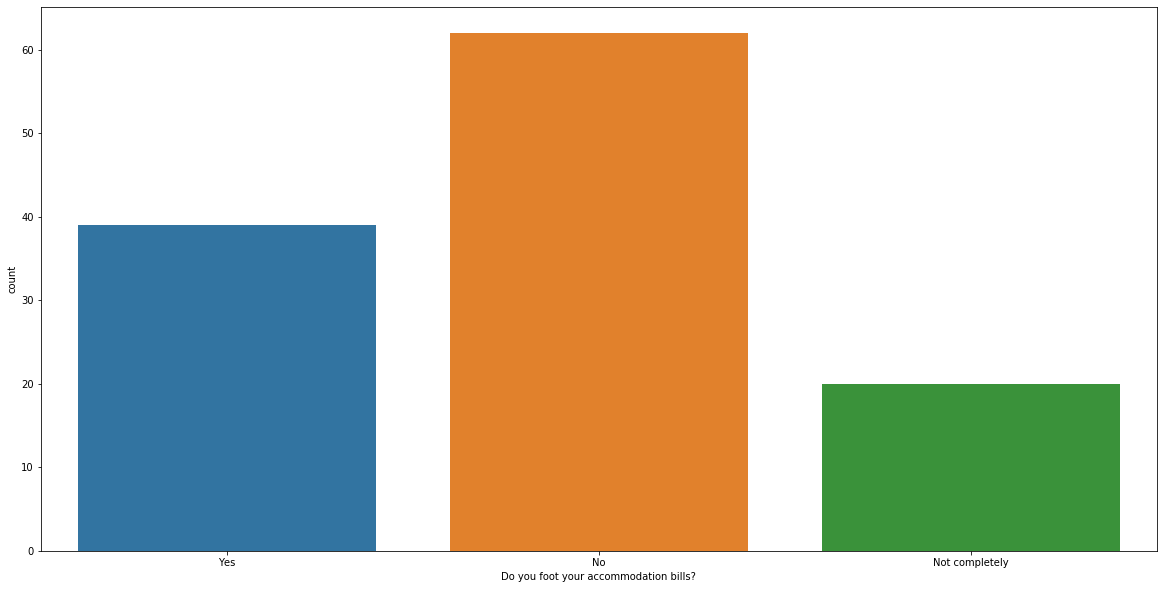

In [238]:
sns.countplot(df["Do you foot your accommodation bills?"])

In [239]:
df['If you selected "Not completely", what fraction of the rent do you pay?'].value_counts()

1/2                              8
1/3                              8
1/4                              7
0                                2
I do pay for my accommodation    1
I don't pay                      1
2/3                              1
Name: If you selected "Not completely", what fraction of the rent do you pay?, dtype: int64

In [ ]:
#The results from the exploratory analysis shows that 78 females and 43 males participated in the survey. 
#The country with most participants is Nigeria with 177 participants out of the overall 121.
# Most participants were 22 years old, and the smallest categories are those that are 18 years old. The ratio of income spent on accommodation was calculated. 
#It was observed that majority of the participants standing at 68, do not pay for their accommodation.